<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%94%D0%97_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

Провести кластеризацію клієнтів. [Опис даних](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

* перевірте дані на пропущені значення
* нормалізуйте дані за допомогою:
  1. StandartScaler
  2. MinMaxScaler
* Визначіть оптимальну кількість кластерів за допомогою методу "ліктя". Оберіть метрики:
  1. distortion
  2. silhouette
  3. calinski_harabasz
* Визначіть оптимальну кількість кластерів за силуетних діаграм
* Обрахуйте середні(або медіанні) значення по кожному кластеру та візуалізуйте результат. Дайте опис кластерам
* Проведіть кластеризацію для очищених від викидів даних


In [141]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module7/data/segmentation%20data.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [143]:
df = df.drop('ID', axis = 1)

In [144]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [145]:
df.nunique()

,0
Sex,2
Marital status,2
Age,58
Education,4
Income,1982
Occupation,3
Settlement size,3


In [146]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.set_output(transform='pandas')

data = scaler.fit_transform(df)

In [147]:
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [148]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [149]:
kmeans.inertia_

513.9660320259301

In [150]:
import matplotlib.pyplot as plt

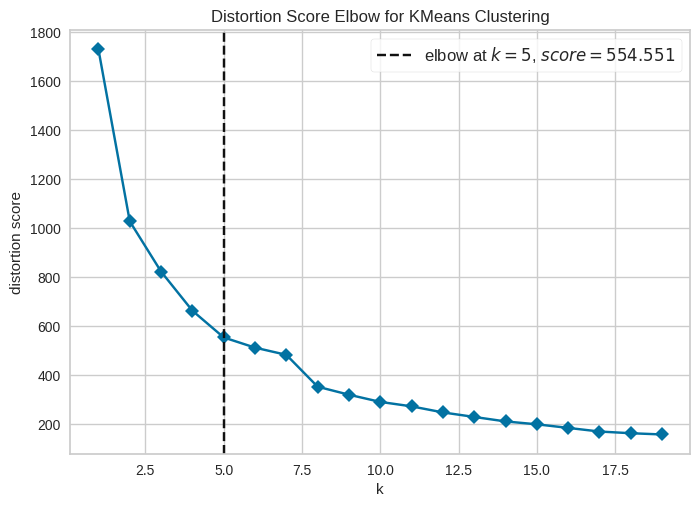

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

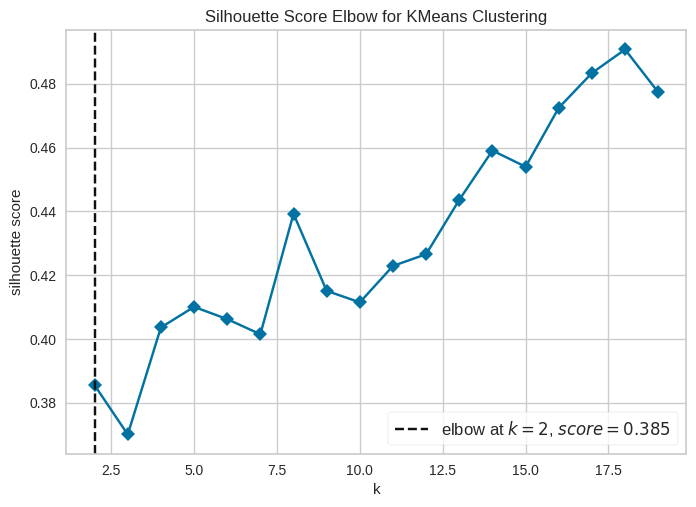

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [152]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 20),
                              timings=False,
                              metric='silhouette', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

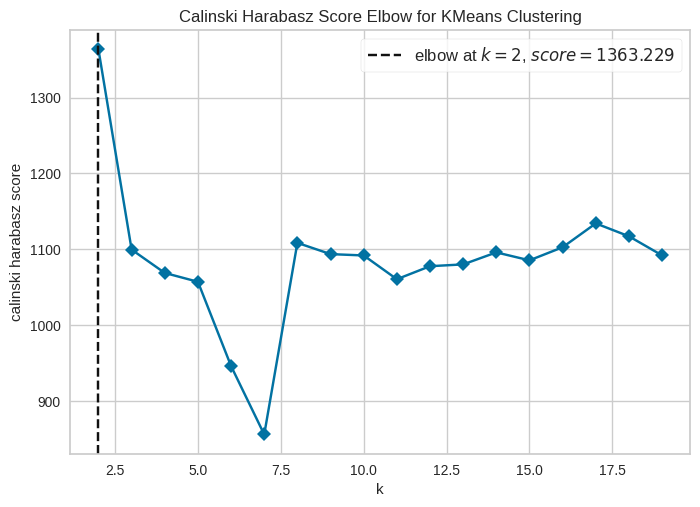

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [153]:
model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(2, 20),
                              timings=False,
                              metric='calinski_harabasz', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


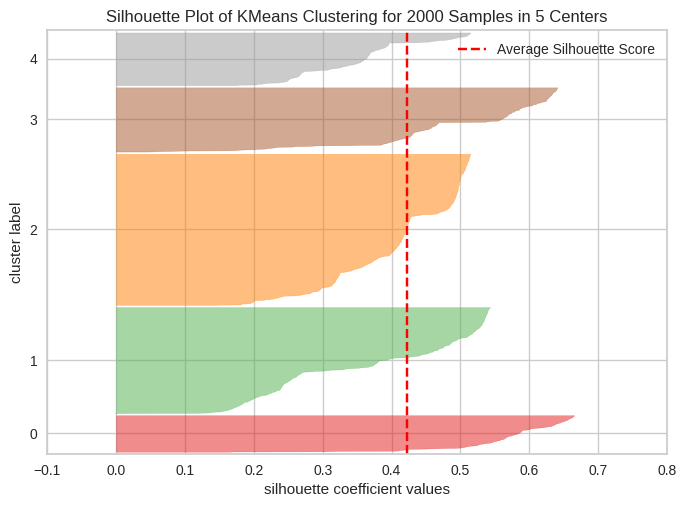

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [154]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data)
visualizer.show()

In [155]:
df['cluster_id'] = kmeans.labels_

In [156]:
df['cluster_id'].value_counts()

,count
cluster_id,
0,736
1,516
3,313
4,257
2,178


In [157]:
results = df.groupby(by='cluster_id').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,1.0,1.0,33.192935,1.262228,116442.165761,0.741848,0.569293
1,0.0,0.0,40.007752,0.821705,145325.602713,1.265504,1.532946
2,1.0,0.0,35.146067,0.932584,97997.241573,0.370787,0.073034
3,0.0,0.0,37.565495,0.738019,102782.319489,0.370607,0.060703
4,0.0,1.0,33.968872,1.268482,122976.723735,0.933852,0.918288


<Axes: xlabel='cluster_id'>

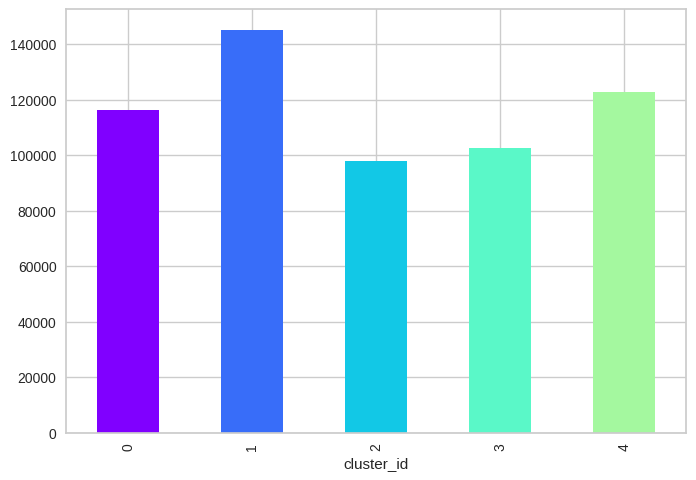

In [158]:
import numpy as np
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))
income = results['Income']
income.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

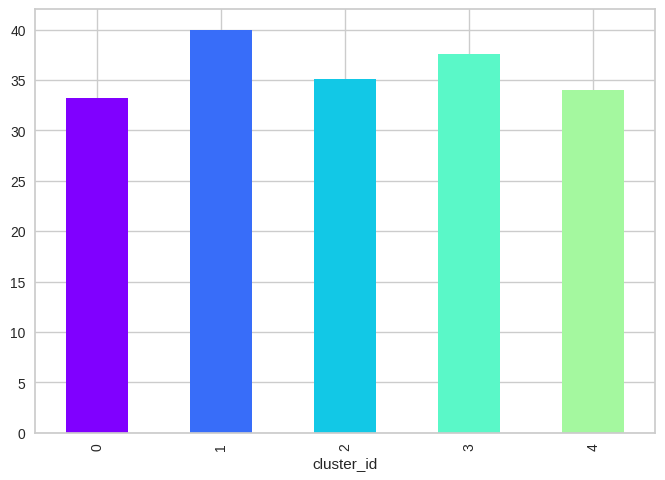

In [159]:
age = results['Age']
age.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

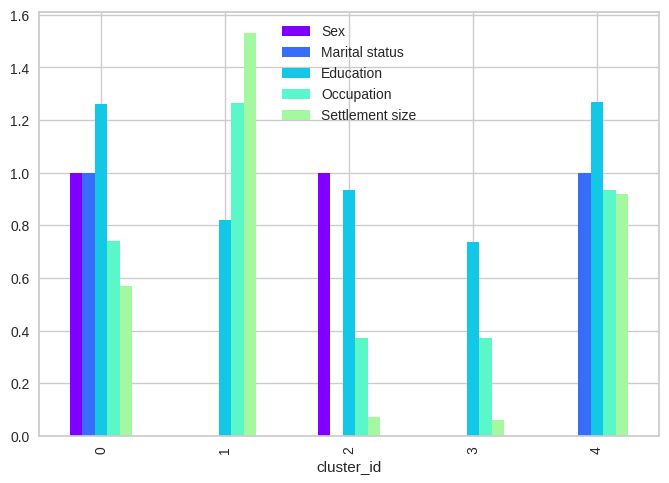

In [160]:
results = results.drop(columns = ['Income','Age'])
results.plot(kind='bar', color=color)

<Axes: >

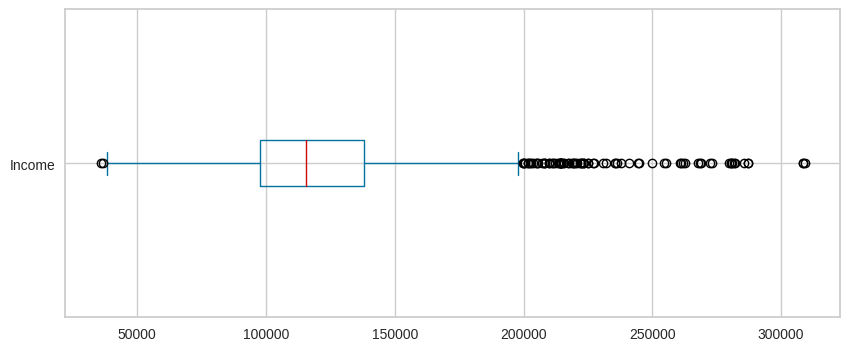

In [161]:
df['Income'].plot(kind='box', vert=False, figsize=(10,4))

In [162]:
column = df['Income']

q1 = column.quantile(q=0.25)
q3 = column.quantile(q=0.75)

iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

mask = (column >= lower) & (column <= upper)
df = df[mask]
df.shape

(1917, 8)

<Axes: >

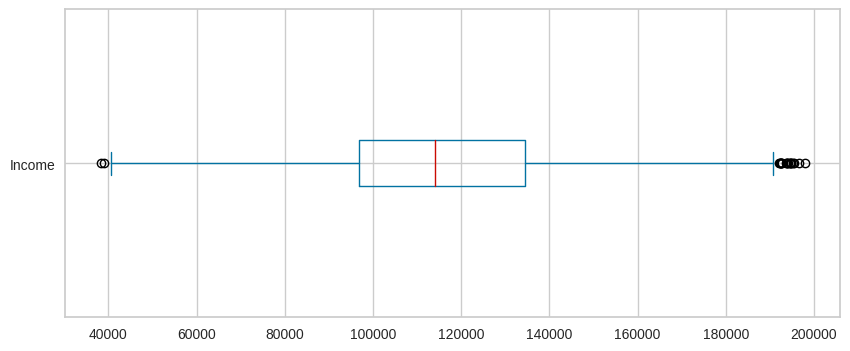

In [163]:
df['Income'].plot(kind='box', vert=False, figsize=(10,4))

In [164]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_id
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,0.465310,0.501304,35.556599,1.026082,116242.158581,0.769431,0.706312,1.429838
std,0.498925,0.500129,11.451748,0.585443,30026.827817,0.612197,0.803715,1.444848
min,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.000000,96769.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,33.000000,1.000000,114007.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,42.000000,1.000000,134467.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,76.000000,3.000000,198029.000000,2.000000,2.000000,4.000000


In [165]:
data = scaler.fit_transform(df)

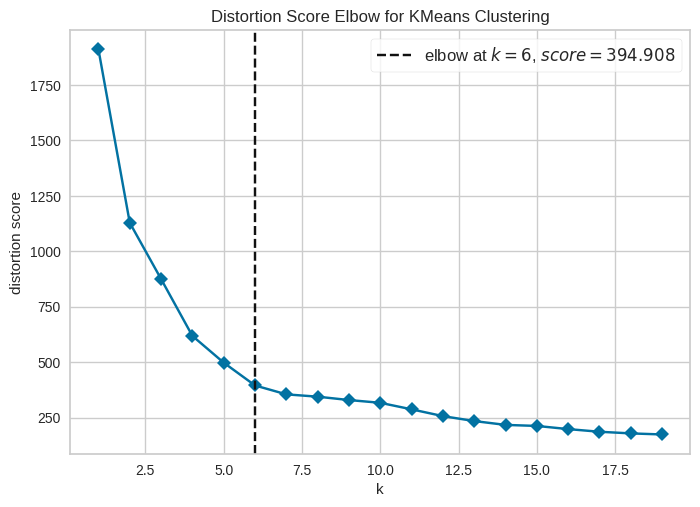

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [166]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init='auto', random_state=42)
visualizer = KElbowVisualizer(model,
                              k=(1, 20),
                              timings=False,
                              metric='distortion', # distortion, silhouette, calinski_harabasz
                              distance_metric='euclidean'
                              )

visualizer.fit(data)
visualizer.show()

In [167]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)

kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


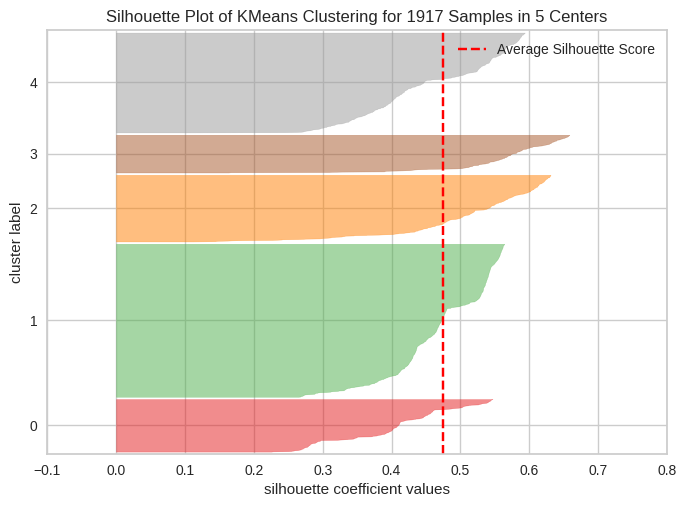

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1917 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [168]:
visualizer = SilhouetteVisualizer(KMeans(5))
visualizer.fit(data)
visualizer.show()

In [169]:
df['cluster_id'] = kmeans.labels_

In [170]:
df['cluster_id'].value_counts()

,count
cluster_id,
1,715
2,467
0,312
3,246
4,177


In [171]:
results = df.groupby(by='cluster_id').mean()

results

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
cluster_id,,,,,,,
0,0.0,0.0,37.544872,0.737179,102408.804487,0.368590,0.060897
1,1.0,1.0,32.879720,1.247552,113166.591608,0.713287,0.544056
2,0.0,0.0,39.513919,0.805139,135935.017131,1.211991,1.526767
3,0.0,1.0,33.593496,1.235772,118220.146341,0.886179,0.894309
4,1.0,0.0,35.152542,0.932203,98343.214689,0.372881,0.073446


<Axes: xlabel='cluster_id'>

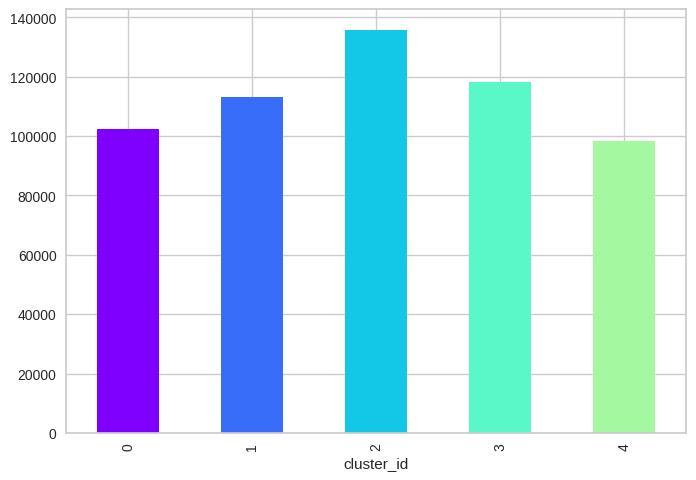

In [172]:
color = plt.cm.rainbow(np.linspace(0, 1, df.shape[1]))
income = results['Income']
income.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

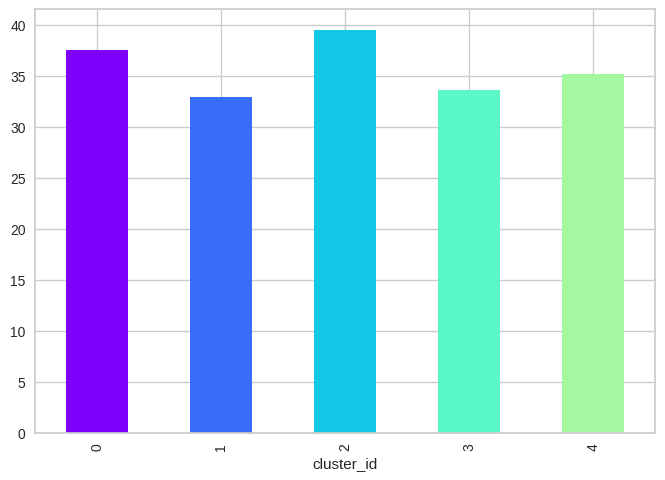

In [173]:
age = results['Age']
age.plot(kind='bar', color=color)

<Axes: xlabel='cluster_id'>

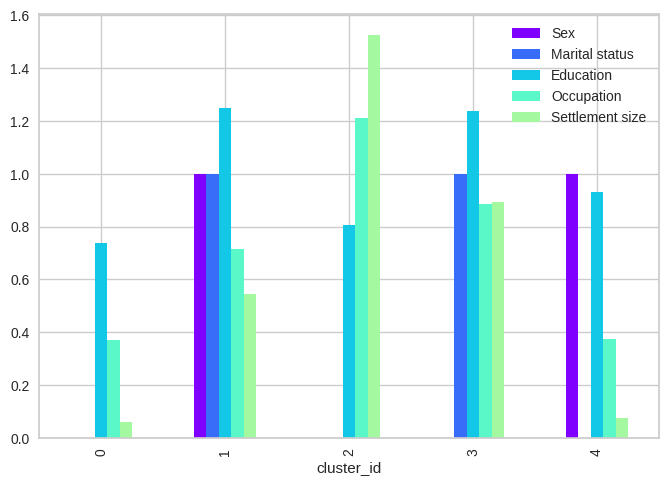

In [174]:
results = results.drop(columns = ['Income','Age'])
results.plot(kind='bar', color=color)